<a href="https://colab.research.google.com/github/vmmadathil/paper_recreations/blob/master/alex_net/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [3]:
##loading in the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [6]:
## creating the validation sets as well by taking the last 5000 images
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [7]:
## creating a tensorflow dataset representation
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [8]:
#class names

CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

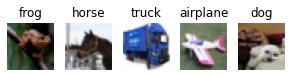

In [12]:
#visualizing some of the training set
plt.figure(figsize = (5, 5))

for i, (image, label) in enumerate(train_ds.take(5)):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(image)
  plt.title(CLASS_NAMES[label.numpy()[0]])
  plt.axis('off')

In [13]:
#looking at the size of the datasets
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [14]:
#function to process images 
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [15]:
batch_size = 32

train_ds = train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size = batch_size, drop_remainder = True)

test_ds = test_ds.map(process_images).shuffle(buffer_size=test_ds_size).batch(batch_size = batch_size, drop_remainder = True)

validation_ds = validation_ds.map(process_images).shuffle(buffer_size=validation_ds_size).batch(batch_size = batch_size, drop_remainder = True)

In [ ]:
#implementing the model
model = keras.models.Sequential([
  #1st conv layer -- 96 kernels, size 11 x 11 x 3, stride of 4
  keras.layers.Conv2D(filters = 96,
                       kernel_size = (11, 11),
                       strides = (4, 4),
                       input_shape = (227, 227, 3),
                       activation = 'relu'),
  #response normalization
  keras.layers.BatchNormalization(),
  #max-pooling
  keras.layers.MaxPool2D(pool_size(3, 3), 
                         strides = (2, 2)),
  #2nd conv layer -- 256 kernels, size 5 x 5 x 48
  keras.layers.Conv2D(filters = 256,
                       kernel_size = (5, 5),
                       strides = (1, 1),
                       padding = "same",
                       activation = 'relu'),
  #response normalization
  keras.layers.BatchNormalization(),
  #max-pooling
  keras.layers.MaxPool2D(pool_size = (3, 3),
                          strides = (2, 2))
#3rd conv layer -- 384 kernels, size 3 x 3 x 256

#4th conv layer -- 384 kernels, size 3 x 3 x 192

#5th conv layer -- 256 kernels, size 3 x 3 x 192

#max-pooling

#fully conected layer -- 4096 neurons

#fully conected layer -- 4096 neurons

#last layer -- 10 neurons
])